<a href="https://colab.research.google.com/github/tlkt/mofan_work/blob/master/304_save_reload.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt


In [0]:
x = torch.unsqueeze(torch.linspace(-1,1,100),dim=1)
y = x.pow(2) + 0.2 * torch.rand(x.size())


In [0]:
def save():
    net1 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1)
    )

    optimizer = torch.optim.SGD(net1.parameters(), lr=0.5)
    loss_func = torch.nn.MSELoss()

    for t in range(100):
        prediction = net1(x)
        loss = loss_func(prediction, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        plt.figure(1, figsize=(10, 3))
        plt.subplot(131)
        plt.title('Net1')
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)

        torch.save(net1, 'net1.pkl')
        torch.save(net1.state_dict(), 'net_params.pkl')



In [0]:
def restore_net():
    net2 = torch.load('net1.pkl')
    prediction = net2(x)

    # plot result
    plt.subplot(132)
    plt.title('Net2')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)


In [0]:
def restore_params():
    net3 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1)
    )

    net3.load_state_dict(torch.load('net_params.pkl'))
    prediction = net3(x)
    # plot result
    plt.subplot(133)
    plt.title('Net3')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
    plt.show()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

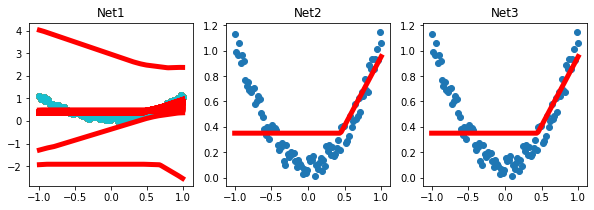

In [6]:
save()

restore_net()

restore_params()